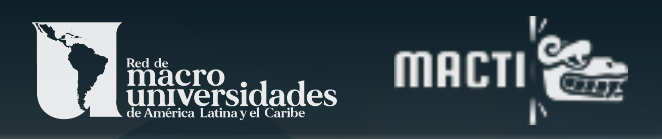

# Introducción a la producción de gráficos con matplotlib

_Después de estudiar la sintaxis de Python y empezar a manejar datos numéricos de manera un poco más profesional, ha llegado el momento de visualizarlos._ 

_Con la biblioteca **matplotlib** podemos crear gráficos de muy alta calidad y altamente personalizables._

_**matplotlib** es una biblioteca muy potente que requiere tiempo de práctica para dominarla. Vamos a empezar por lo más sencillo._

## La biblioteca matplotlib

* Estándar *de facto* para visualización en Python
* Pretende ser similar a las funciones de visualización de MATLAB
* Diferentes formas de usarla: interfaz `pyplot` y orientada a objetos

Lo primero que vamos a hacer es importar los paquetes necesarios para trabajar.

In [106]:
import numpy as np
import matplotlib.pyplot as plt

La biblioteca **matplotlib** es gigantesca y es difícil hacerse una idea global de todas sus posibilidades en una primera toma de contacto. 

Es recomendable tener a mano la documentación y la galería (http://matplotlib.org/gallery.html#pylab_examples):

Si hacemos clic en cualquiera de las imágenes, accedemos al código fuente que la ha generado (ejemplo: http://matplotlib.org/examples/pylab_examples/annotation_demo.html):

## Interfaz pyplot

La interfaz `pyplot` proporciona una serie de funciones que operan sobre un *estado global* - es decir, nosotros no especificamos sobre qué gráfica o ejes estamos actuando. Es una forma rápida y cómoda de crear gráficas pero perdemos parte del control.

### Función `plot`

El paquete `pyplot` se suele importar bajo el alias `plt`, de modo que todas las funciones se acceden a través de `plt.<funcion>`. La función más básica es la función `plot`:

In [108]:
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

### Un primer gráfico

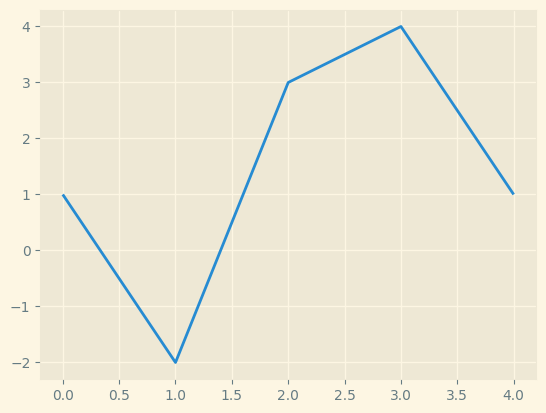

In [109]:
plt.plot([1, -2, 3, 4, 1])

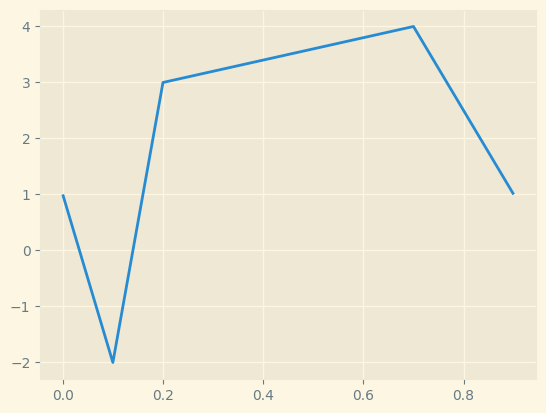

In [110]:
plt.plot([0.0, 0.1, 0.2, 0.7, 0.9], [1, -2, 3, 4, 1])

La función `plot` recibe una sola lista (si queremos especificar los valores *y*) o dos listas (si especificamos *x* e *y*). Naturalmente si especificamos dos listas ambas tienen que tener la misma longitud.

La tarea más habitual a la hora de trabajar con matplotlib es representar una función. Lo que tendremos que hacer es definir un dominio y evaluarla en dicho dominio.

Por ejemplo, grafiquemos la función

$$ f(x) = e^{-x^2} $$

In [111]:
"""
Aqui definimos la función dada
"""
def f(x):
    return np.exp(-x ** 2)

In [112]:
"""
Aqui definimos otra función
"""
def g(x):
    return np.exp(-x ** 3)

Definimos el dominio con la función `np.linspace`, que crea un vector de puntos equiespaciados:

In [113]:
"""
Graficaremos desde x = -1, hasta x = 5, en 101 pasos
"""
x = np.linspace(-1, 5, 101)
# x = np.linspace(-1,5,num=101)

Y representamos la función:

Text(0.5, 1.0, 'Función $f(x)$')

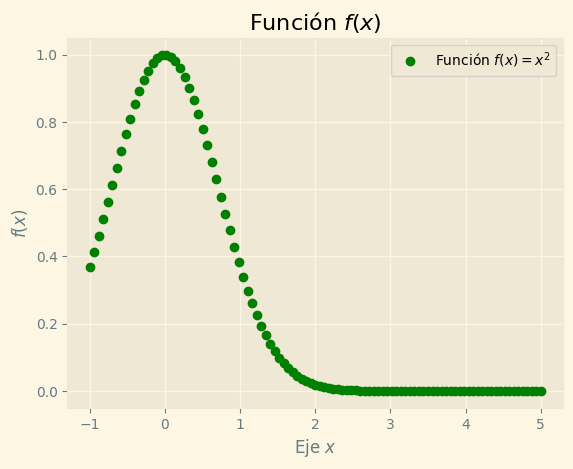

In [114]:
plt.plot(x, f(x), 'og', label="Función $f(x)=x^2$")
plt.xlabel("Eje $x$")
plt.ylabel("$f(x)$")
plt.legend()
plt.title("Función $f(x)$")

Notamos varias cosas:

* Con diversas llamadas a funciones dentro de `plt.` se actualiza el gráfico *actual*. Esa es la forma de trabajar con la interfaz pyplot.
* Podemos añadir etiquetas, y escribir $\LaTeX$ en ellas. Tan solo hay que encerrarlo entre signos de dólar $$.
* Añadiendo como argumento `label` podemos definir una leyenda.

### Personalización

La función `plot` acepta una serie de argumentos para personalizar el aspecto de la función. Con una letra podemos especificar el color, y con un símbolo el tipo de línea.

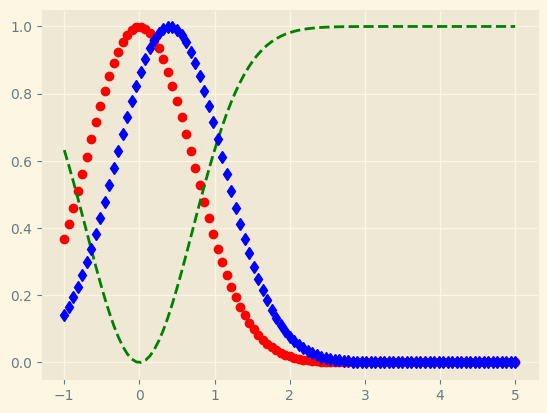

In [115]:
plt.plot(x, f(x), 'ro')
plt.plot(x, 1 - f(x), 'g--')
plt.plot(x, f(x-0.4), 'bd')

Esto en realidad son códigos abreviados, que se corresponden con argumentos de la función `plot`:

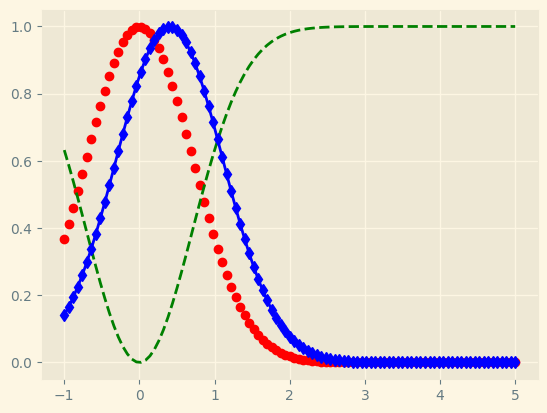

In [116]:
plt.plot(x, f(x), color='red', linestyle='', marker='o')
plt.plot(x, 1 - f(x), c='g', ls='--')
plt.plot(x, f(x-0.4), c='blue', marker='d')

La lista de posibles argumentos y abreviaturas está disponible en la documentación de la función `plot` http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot.

### Más personalización, pero muchas más

Con matplotlib se puede manipular fácilmente la apariencia de la gráfica usando **estilos**. Para ver qué estilos hay disponibles, escribiríamos `plt.style.available`.

In [117]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

Para emplear un estilo solo a una porción del código, creamos un bloque `with plt.style.context("STYLE")`:

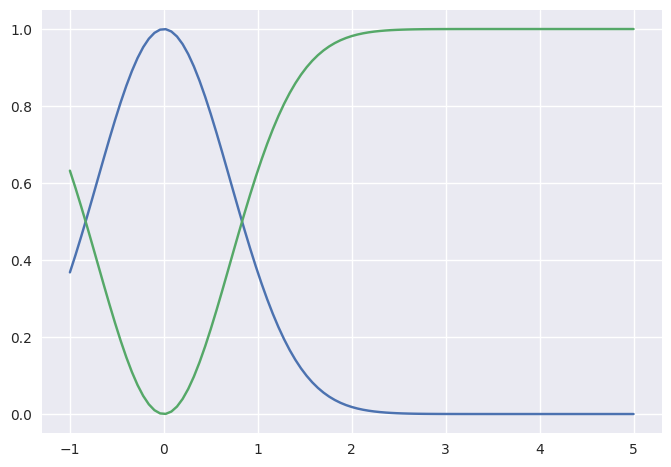

In [118]:
with plt.style.context('seaborn'):
    plt.plot(x, f(x))
    plt.plot(x, 1 - f(x))

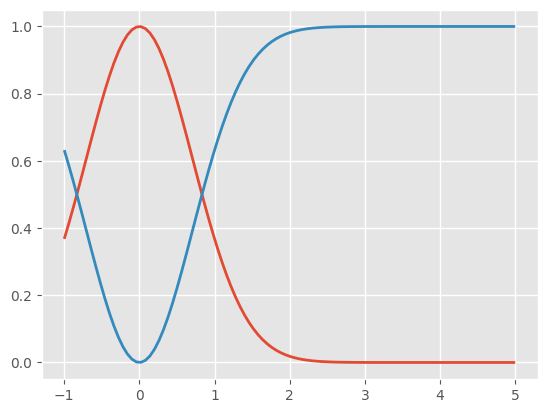

In [119]:
with plt.style.context('ggplot'):
    plt.plot(x, f(x))
    plt.plot(x, 1 - f(x))

### Otros tipo de gráficas

La función `scatter` muestra una nube de puntos, con posibilidad de variar también el tamaño y el color.

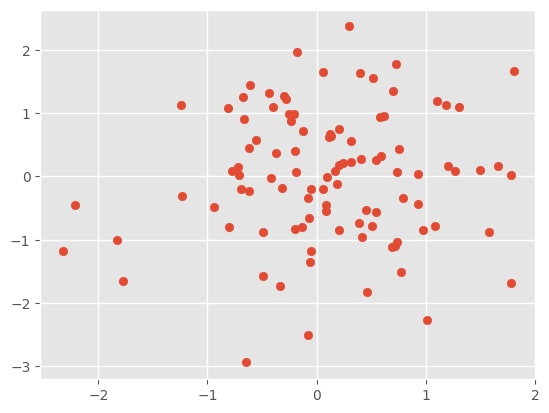

In [120]:
N = 100
x = np.random.randn(N)
y = np.random.randn(N)
with plt.style.context('ggplot'):
     plt.scatter(x, y)

Con `s` y `c` podemos modificar el tamaño y el color respectivamente. Para el color, a cada valor numérico se le asigna un color a través de un *mapa de colores*; ese mapa se puede cambiar con el argumento `cmap`. Esa correspondencia se puede visualizar llamando a la función `colorbar`.

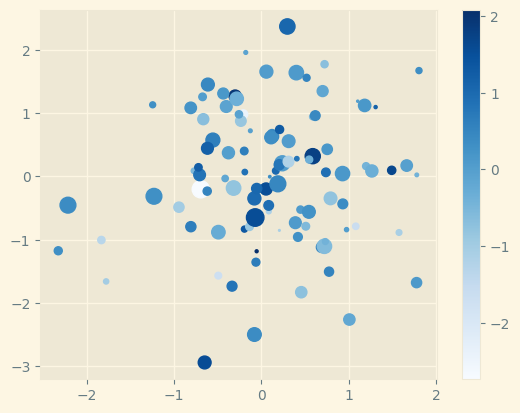

In [121]:
s = np.abs(50 + 50 * np.random.randn(N))
c = np.random.randn(N)

plt.scatter(x, y, s=s, c=c, cmap=plt.cm.Blues)
plt.colorbar()

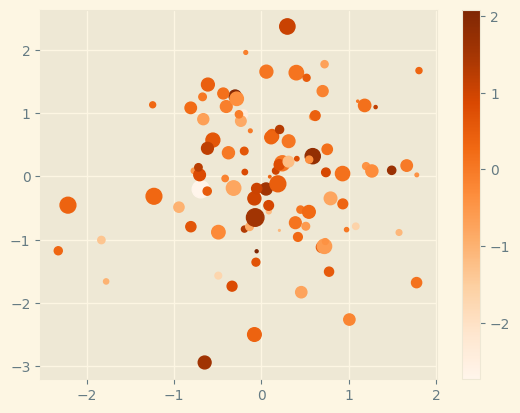

In [122]:
plt.scatter(x, y, s=s, c=c, cmap=plt.cm.Oranges)
plt.colorbar()

matplotlib trae por defecto muchos mapas de colores. En las SciPy Lecture Notes dan una lista de todos ellos (https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)

La función `contour` se utiliza para visualizar las curvas de nivel de funciones de dos variables y está muy ligada a la función `np.meshgrid`. Veamos un ejemplo:

$$h(x) = x^2 - y^2$$

In [123]:
def h(x, y):
    return x ** 2 - y ** 2

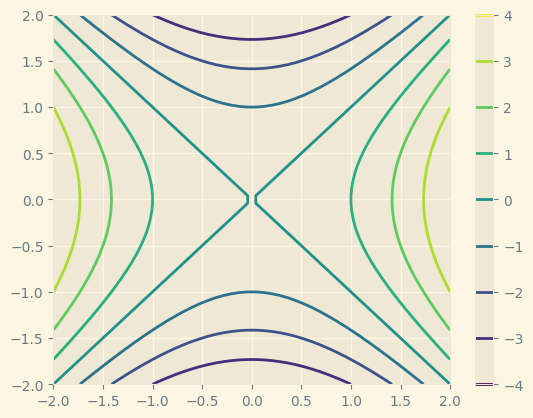

In [124]:
x = np.linspace(-2, 2)
y = np.linspace(-2, 2)
xx, yy = np.meshgrid(x, y)
zz = h(xx, yy)

plt.contour(xx, yy, zz)
plt.colorbar()

La función `contourf` es casi idéntica pero rellena el espacio entre niveles. Podemos especificar manualmente estos niveles usando el cuarto argumento:

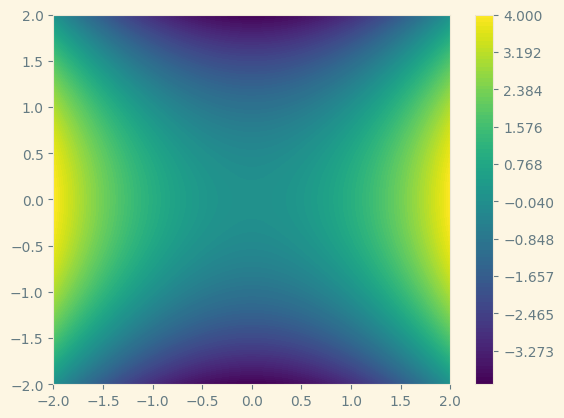

In [125]:
plt.contourf(xx, yy, zz, np.linspace(-4, 4, 100))
plt.colorbar()

Para guardar las gráficas en archivos aparte podemos usar la función `plt.savefig`. matplotlib usará el tipo de archivo adecuado según la extensión que especifiquemos. Veremos esto con más detalle cuando hablemos de la interfaz orientada a objetos.

### Varias figuras

Podemos crear figuras con varios sistemas de ejes, pasando a `subplot` el número de filas y de columnas.

Text(0.5, 1.0, 'Función coseno')

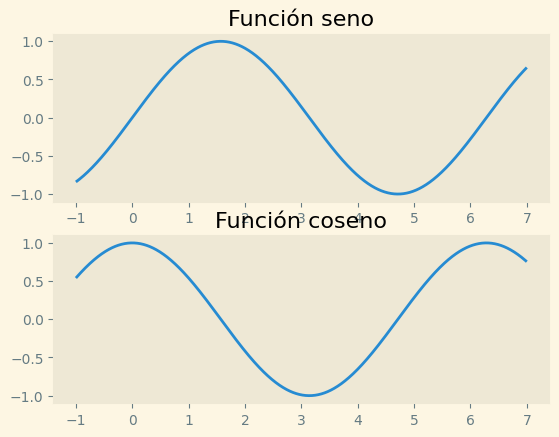

In [126]:
x = np.linspace(-1, 7, 1000)

fig = plt.figure()
plt.subplot(211)
plt.plot(x, np.sin(x))
plt.grid(False)
plt.title("Función seno")

plt.subplot(212)
plt.plot(x, np.cos(x))
plt.grid(False)
plt.title("Función coseno")

<div class="alert alert-info"> Para ajustar los gráficos para que no se solapen, usamos
 <b>fig.tight_layout()</b>
     
 También es útil buscar en Google "plt.subplot adjust"</div>

Como hemos guardado la figura en una variable, puedo recuperarla más adelate y seguir editándola.

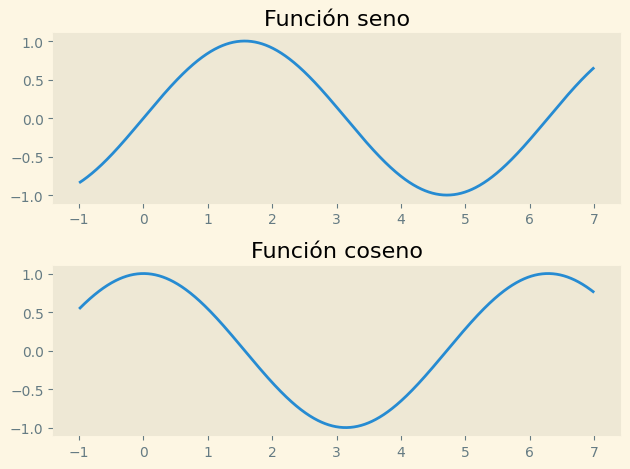

In [127]:
fig.tight_layout()
fig

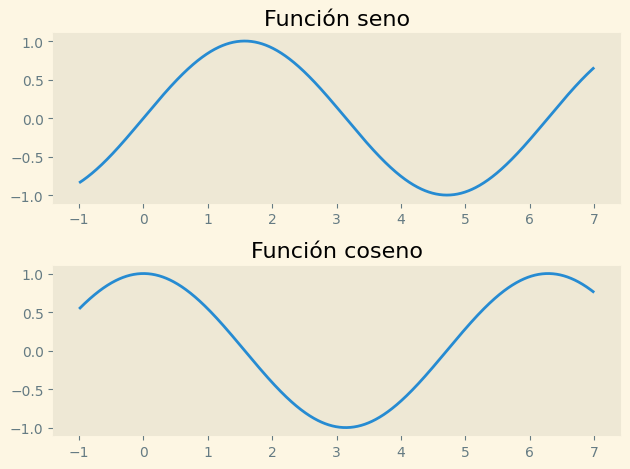

In [128]:
x = np.linspace(-1, 7, 1000)

fig = plt.figure()
plt.subplot(211)
plt.plot(x, np.sin(x))
plt.grid(False)
plt.title("Función seno")

plt.subplot(212)
plt.plot(x, np.cos(x))
plt.grid(False)
plt.title("Función coseno")
fig.tight_layout()

**Ejemplo**

Crear una función que represente gráficamente esta expresión:

$$\sin(2 \pi f_1 t) + \sin(2 \pi f_2 t)$$

Siendo $f_1$ y $f_2$ argumentos de entrada (por defecto $10$ y $100$) y $t \in [0, 0.5]$. 

Además, debe mostrar:

* leyenda,
* título "Dos frecuencias",
* eje x "Tiempo ($t$)"

y usar algún estilo de los disponibles.

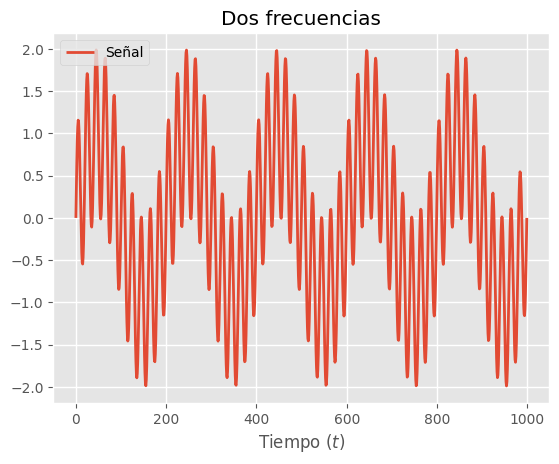

In [129]:
def frecuencias(f1=10.0, f2=100.0): # Aqui tenemos los valores 10.0 y 100.0 por defecto
    max_time = 0.5  # Aqui definimos el máximo del intervalo
    times = np.linspace(0, max_time, 1000) 
    signal = np.sin(2 * np.pi * f1 * times) + np.sin(2 * np.pi * f2 * times)
    with plt.style.context("ggplot"):  # definimos este estilo
        plt.plot(signal, label="Señal")
        plt.xlabel("Tiempo ($t$)")
        plt.title("Dos frecuencias")
        plt.legend()

frecuencias()

**Ejemplo**

Representar las curvas de nivel de esta función:

$$w(x, y) = \cos{x} + \sin^2{y}$$

Text(0.5, 1.0, 'Función $w(x, y) = \\cos{x} + \\sin^2{y}$')

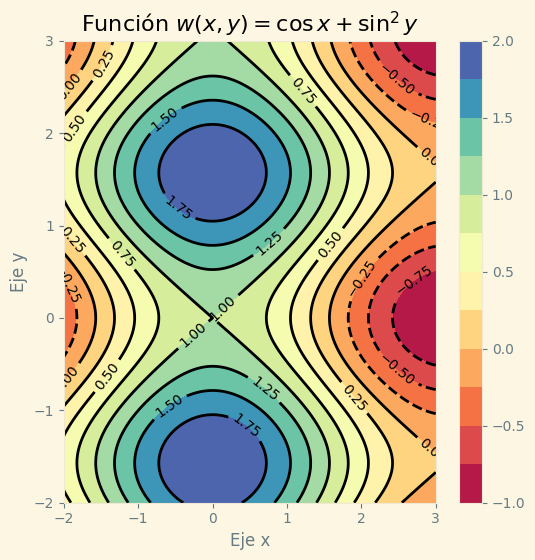

In [130]:
def w(x, y):
    return np.cos(x) + np.sin(y) ** 2

# Necesitamos muchos puntos en la malla, para que cuando se
# crucen las líneas no se vean irregularidades
x = np.linspace(-2, 3, 1000)
y = np.linspace(-2, 3, 1000)

xx, yy = np.meshgrid(x, y) # Observemos este nueva función meshgrid de numpy

zz = w(xx, yy)

# Podemos ajustar el tamaño de la figura con figsize
fig = plt.figure(figsize=(6, 6))

# Ajustamos para que tenga 13 niveles y que use el colormap Spectral
# Tenemos que asignar la salida a la variable cs para luego crear el colorbar
cs = plt.contourf(xx, yy, zz, np.linspace(-1, 2, 13), cmap=plt.cm.Spectral)

# Creamos la barra de colores
plt.colorbar()

# Con `colors='k'` dibujamos todas las líneas negras
# Asignamos la salida a la variable cs2 para crear las etiquetas
cs = plt.contour(xx, yy, zz, np.linspace(-1, 2, 13), colors='k')

# Creamos las etiquetas sobre las líneas
plt.clabel(cs)

# Ponemos las etiquetas de los ejes
plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.title(r"Función $w(x, y) = \cos{x} + \sin^2{y}$")

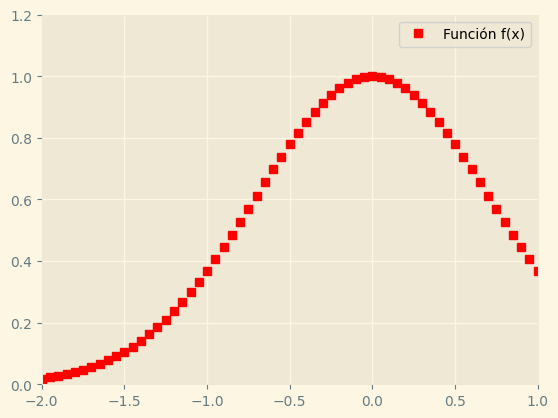

In [131]:
fig, axes = plt.subplots()
x = np.linspace(-2, 3, 101)
axes.plot(x,f(x), 'sr',label='Función f(x)')
axes.set_xlim(-2,1)
axes.set_ylim(0,1.2)
plt.legend()
plt.grid(True)
fig.savefig('Ejemplo18.png')
plt.show()

In [132]:
"""
Aqui definimos la función dada
"""
def f(x):
    return np.exp(-x ** 2)

In [133]:
# Definimos g(x)
def g(x):
    return 1.0/f(x)

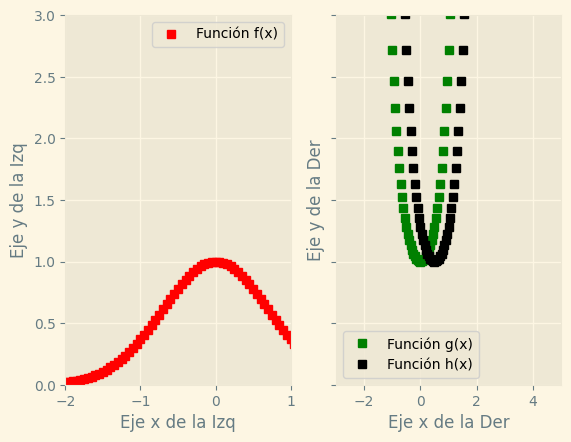

In [134]:
fig, axes = plt.subplots(1,2, sharey = True)
axes[0].plot(x,f(x), 'sr',label='Función f(x)')
axes[1].plot(x,g(x), 'sg',label='Función g(x)')
axes[1].plot(x,g(x-0.5), 's',color='black',label='Función h(x)')
axes[0].set_xlim(-2,1)
axes[1].set_xlim(-3,5)
axes[0].set_ylim(0,3)
#axes[1].set_ylim(0,5)
axes[0].set_xlabel("Eje x de la Izq")
axes[1].set_xlabel('Eje x de la Der')
axes[0].set_ylabel('Eje y de la Izq')
axes[1].set_ylabel('Eje y de la Der')
axes[0].legend()
axes[1].legend()
axes[0].grid(True)
axes[1].grid(True)
#fig.savefig('Ejemplo19.png')
plt.show()

### Graficos tipo scater

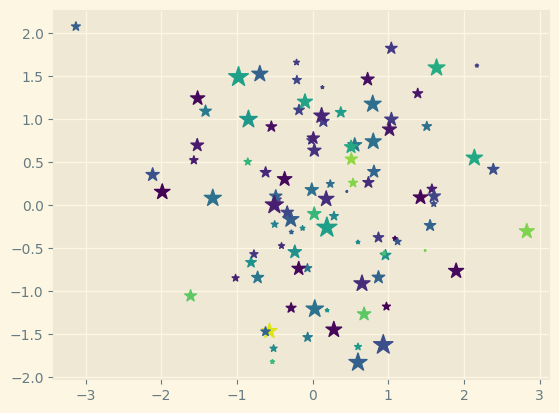

In [135]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


x = np.random.randn(100)
y = np.random.randn(100)
s = np.abs(100 * np.random.randn(100))
c = np.abs(np.random.randn(100))
plt.scatter(x, y, s, c, '*')


plt.show()

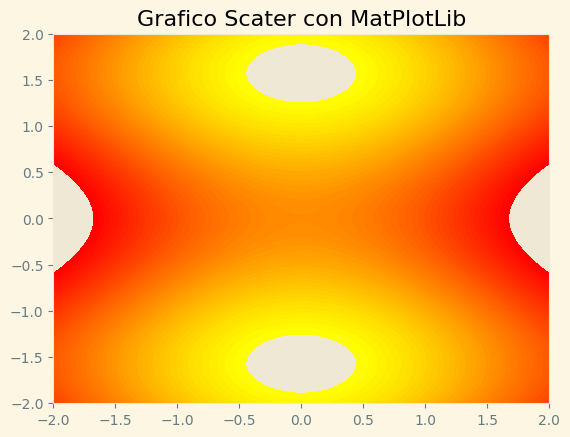

In [136]:
x = np.linspace(-2,2)
y = np.linspace(-2,2)

xx, yy = np.meshgrid(x,y)

def g(x, y):
    return np.cos(x) + np.sin(y)**2

zz = g(xx, yy)

fig, axes = plt.subplots()
#axes.contour(xx, yy, zz)
#axes.contourf(xx, yy, zz, cmap=plt.cm.pink_r)
#axes.contourf(xx, yy, zz, np.linspace(-0.1, 1.9), hatches=['-', '/', '\\', '//'], 
#    extend='both', cmap=plt.cm.autumn)
axes.contourf(xx, yy, zz, np.linspace(-0.1, 1.9), cmap=plt.cm.autumn)
#axes.contour(xx, yy, zz, np.linspace(-0.9, 0.9), alpha=0.5, cmap=plt.cm.autumn)
plt.title('Grafico Scater con MatPlotLib')
plt.grid()
plt.show()

### Grafiquemos una parábola 
y le agreguemos un punto

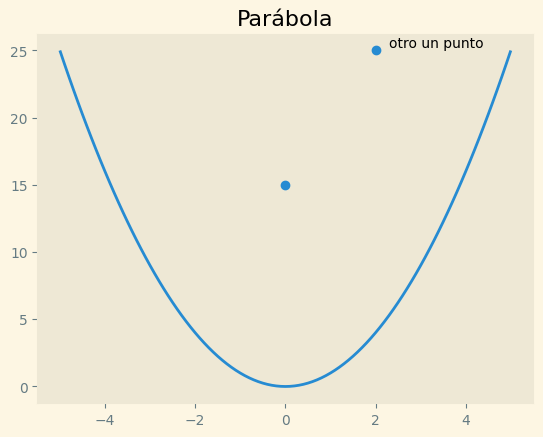

In [137]:
x = [0.1*i for i in range(-50, 51)]
y = [x_i**2 for x_i in x]
plt.plot(x,y)
plt.title('Parábola')
plt.scatter([0, 2], [15, 25])
#plt.annotate(text='un punto', xy=(0, 15), xytext=(0.3, 15.2))
plt.annotate(text='otro un punto', xy=(2, 25), xytext=(2.3, 25.2))
plt.grid()

### Grafiquemos una gaussiana
y probemos distintos tipos de símbolos

In [138]:
def gauss(x,mu=0,sigma=1):
    """
    definimos una funcion gaussiana con mu = 0 y sigma = 1 por defecto
    """
    return np.exp(-(x-mu)**2)/(2*sigma)/ (sigma*2*np.pi)

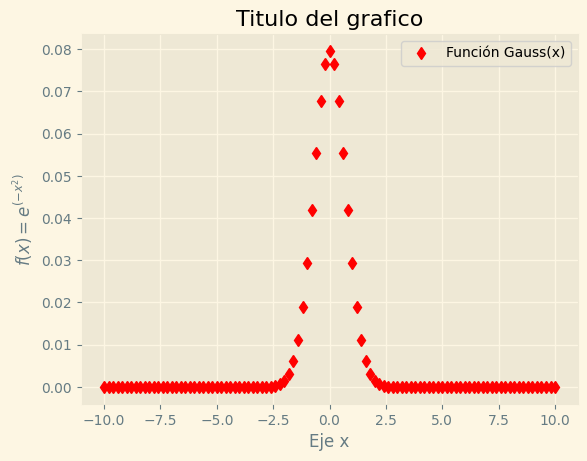

In [139]:
%matplotlib inline
x = np.linspace(-10, 10, num=101)

plt.plot(x, gauss(x),'dr', label='Función Gauss(x)') # d, h, o, p, s, v, x, or, xg, 
plt.xlabel('Eje x')
plt.ylabel('$f(x) = e^{(-x^2)}$')
plt.legend()
plt.title('Titulo del grafico')
plt.grid(True)
plt.show()


### Gráficos tipo pizza
En primer lugar mostraremos como Montar nuestro Drive con este sitio.  
Luego Instalaremos la librería csv que no viene por defecto instalada en Colab.  
Y luego leeremos los datos

In [140]:
# Montamos el GDrive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [141]:
# La librería CSV no está instalada por default in Google Colab, por ello debemos instalarla, cada vez que abrimos este Notebook
# Si bien muestra errores, esta librería trabaja adecuadamente
#! pip install python-csv
! pip install python-csv==0.0.10

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


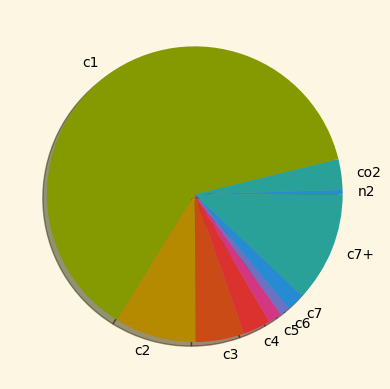

In [142]:
import csv # esta es una libreria para manipular archivos tipo csv
fileCSV = 'gdrive/My Drive/Colab Notebooks/MeIA/near_critical_oil.csv'
with open(fileCSV) as csv_file:
    reader = csv.reader(csv_file)
    critical_oil = [line for line in reader]   # o list(reader)

components = [c for (c, f) in critical_oil[1:]]
fraction = [float(f) for (c, f) in critical_oil[1:]]
# el ; evita el output de la celda
plt.pie(fraction, labels=components, shadow=True);

### Gráfico de Histogramas

In [143]:
import random as rnd # Importamos la librería random
campana = [rnd.gauss(1, 0.3) for i in range(10000)]

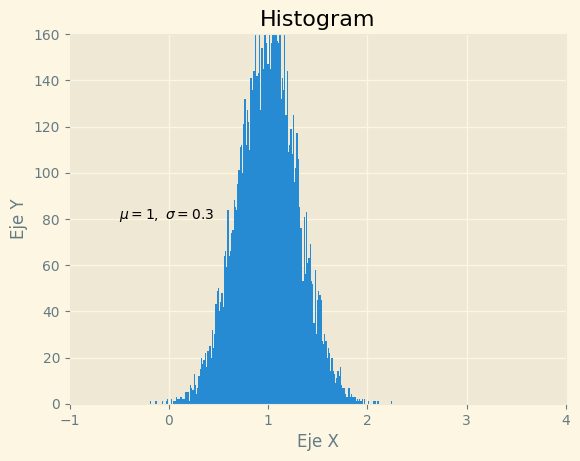

In [144]:
#plt.style.use('ggplot')
plt.style.use('Solarize_Light2')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Histogram')
plt.text(-0.5,80, '$\mu=1,\ \sigma=0.3$')
plt.xlim(-1, 4)
plt.ylim(0, 160)
plt.grid(True)
plt.hist(campana, bins=200);
plt.savefig("Ejemplo1.eps", format='eps')
#plt.savefig("Ejemplo1.jpg", format='jpg')
plt.savefig("Ejemplo1.png", format='png')

#plt.savefig(fname, dpi=None, facecolor='w', edgecolor='w',
#        orientation='portrait', papertype=None, format=None,
#        transparent=False, bbox_inches=None, pad_inches=0.1,
#        frameon=None, metadata=None)



## Grabar y leer archivos de datos

Primero generaremos unos datos

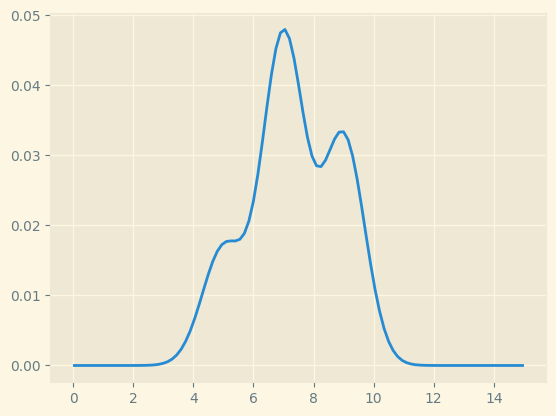

In [145]:
x = np.linspace(0, 15, num=101)
y = 0.3 * gauss(x, 5, 1.2) + gauss(x, 7, 1.3) + 0.8* gauss(x, 9.0, 1.4)
plt.plot(x,y)
plt.grid(True)
plt.show()

Ahora los grabaremos, en una archivo con dos columnas (x,y)

In [146]:
fname = 'MisDatoss.txt'
np.savetxt(fname, (x,y), fmt='%.18e', delimiter=' ', header=' Datos_X Datos_Y', 
           footer='Un footer', comments='# Más Info', encoding=None)

Podemos chequear que el archivo existe

In [147]:
# !cat MisDatoss.txt  # para linux
# !type MisDatos.txt   # para Windows
# !more MisDatos.txt   # para Linux

Ahora los leemos a los datos y los guardamos en el arreglo _misdatosTXT_

In [148]:
misdatosTXT = np.loadtxt(fname, dtype= 'float', comments='#', delimiter=None, 
                         converters=None, skiprows=1, usecols=None, unpack=False, ndmin=0)

In [149]:
print(misdatosTXT[:])
# print(misdatosTXT.T)

[[0.00000000e+00 1.50000000e-01 3.00000000e-01 4.50000000e-01
  6.00000000e-01 7.50000000e-01 9.00000000e-01 1.05000000e+00
  1.20000000e+00 1.35000000e+00 1.50000000e+00 1.65000000e+00
  1.80000000e+00 1.95000000e+00 2.10000000e+00 2.25000000e+00
  2.40000000e+00 2.55000000e+00 2.70000000e+00 2.85000000e+00
  3.00000000e+00 3.15000000e+00 3.30000000e+00 3.45000000e+00
  3.60000000e+00 3.75000000e+00 3.90000000e+00 4.05000000e+00
  4.20000000e+00 4.35000000e+00 4.50000000e+00 4.65000000e+00
  4.80000000e+00 4.95000000e+00 5.10000000e+00 5.25000000e+00
  5.40000000e+00 5.55000000e+00 5.70000000e+00 5.85000000e+00
  6.00000000e+00 6.15000000e+00 6.30000000e+00 6.45000000e+00
  6.60000000e+00 6.75000000e+00 6.90000000e+00 7.05000000e+00
  7.20000000e+00 7.35000000e+00 7.50000000e+00 7.65000000e+00
  7.80000000e+00 7.95000000e+00 8.10000000e+00 8.25000000e+00
  8.40000000e+00 8.55000000e+00 8.70000000e+00 8.85000000e+00
  9.00000000e+00 9.15000000e+00 9.30000000e+00 9.45000000e+00
  9.6000

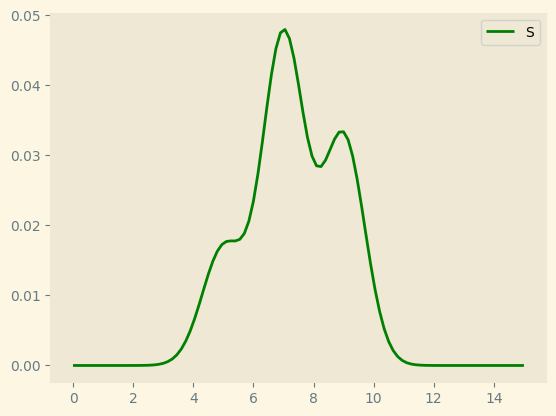

In [150]:
# Lo Grafiquemos
# Observar como se leen los datos
x = misdatosTXT[0,:]
y = misdatosTXT[1,:]
fig, axes = plt.subplots()
#axes.plot(datos[:,0],datos[:,1], 'k')
axes.plot(x,y, 'g')
plt.legend('Spectra')
plt.grid()
plt.show()

Lo mismo pero transpuesto

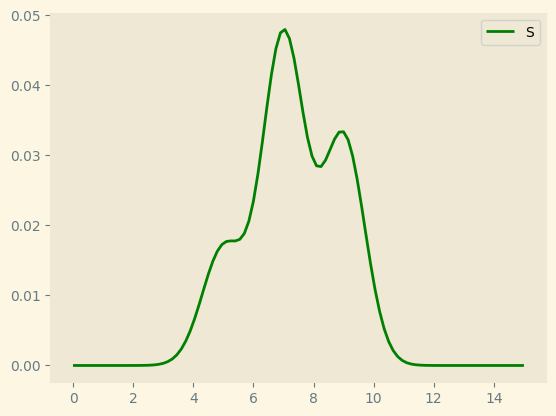

In [151]:
# Lo Grafiquemos
# Observar como se leen los datos
x = misdatosTXT.T[:,0]
y = misdatosTXT.T[:,1]
fig, axes = plt.subplots()
#axes.plot(datos[:,0],datos[:,1], 'k')
axes.plot(x,y, 'g')
plt.legend('Spectra')
plt.grid()
plt.show()

Ahora grabamos los mismos datos en un Archivo como `.csv`

In [152]:
fname = 'MisDatos.csv'
np.savetxt(fname, (x,y), fmt='%.18e', delimiter=', ', header=' Datos_X Datos_Y', 
           footer='Un footer', comments='# Más Info', encoding=None)

In [153]:
misdatosCSV = np.loadtxt(fname, dtype= 'float', comments='#', delimiter=', ', converters=None, skiprows=1, 
              usecols=None, unpack=False, ndmin=0)

In [154]:
# print(misdatosCSV)
# print(misdatosCSV.T)

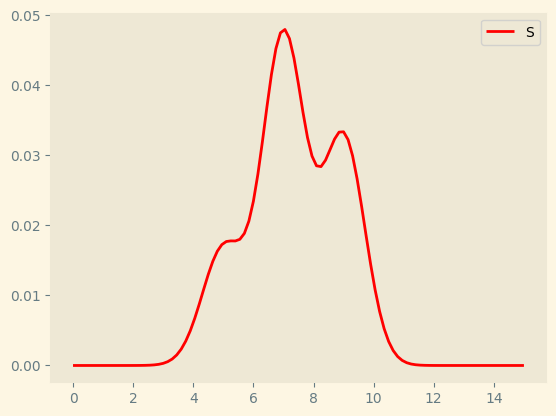

In [155]:
x=misdatosCSV.T[:,0]
y=misdatosCSV.T[:,1]
fig, axes = plt.subplots()
#axes.plot(datos[:,0],datos[:,1], 'k')
axes.plot(x,y, 'r')
plt.legend('Spectra')
plt.grid()
plt.show()

Aqui voy a leer otro archivo preexistente

In [156]:
# !cat MisDatos.txt  # para linux
# !type SpectrumPrueba.txt   # para Windows
# !more MisDatos.txt   # para Linux

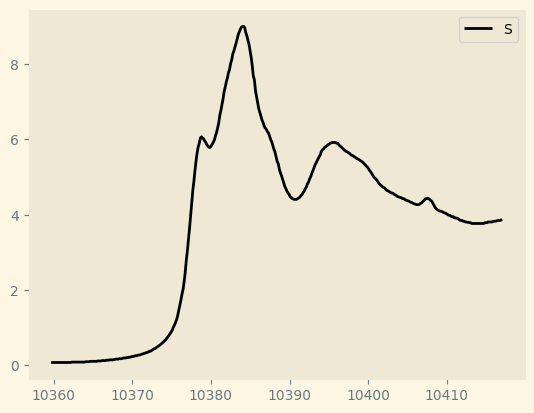

In [157]:
# datos = np.loadtxt('SpectrumPrueba.txt', usecols=(0,1), skiprows=1)
datos = np.loadtxt('gdrive/My Drive/Colab Notebooks/MeIA/SpectrumPrueba.csv', delimiter=',', usecols=(0,1), skiprows=1)
#print(datos)
#x = np.arange(len(datos[:,0]))
x = datos[:,0]
y = datos[:,1]
fig, axes = plt.subplots()
#axes.plot(datos[:,0],datos[:,1], 'k')
axes.plot(x,y, 'k')
plt.legend('Spectra')
plt.grid()
plt.show()

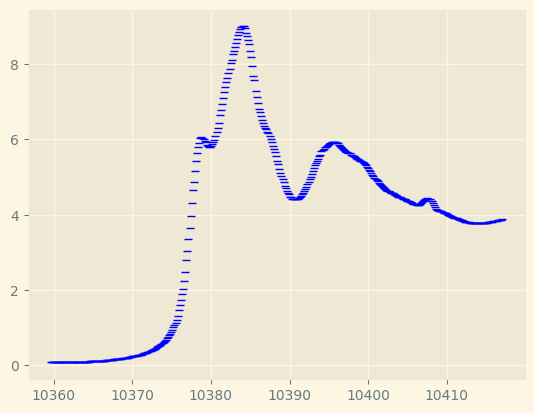

In [158]:
plt.plot(x,y, '_b')
plt.grid(True)
plt.show()


## Las "galerías" de matplotlib

###   Este es el método más importante para graficar con matplotlib


1. Ir a http://matplotlib.org/gallery
2. Elegir el gráfico de ejemplo que más se parezca a lo que queremos lograr
3. Copiar el código del ejemplo y adaptarlo a nuestros datos y gustos


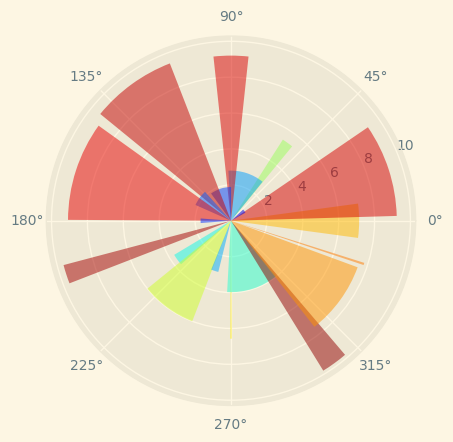

In [159]:
#import numpy as np
#import matplotlib.pyplot as plt


N = 20
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)

ax = plt.subplot(111, projection='polar')
bars = ax.bar(theta, radii, width=width, bottom=0.0)

# Use custom colors and opacity
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r / 10.))
    bar.set_alpha(0.5)

plt.show()